In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import PyQuante
from PyQuante.Molecule import Molecule

In [3]:
h2o = Molecule('H2O',
                   [(8,  ( 0.00000000,     0.00000000,     0.04851804)),
                    (1,  ( 0.75300223,     0.00000000,    -0.51923377)),
                    (1,  (-0.75300223,     0.00000000,    -0.51923377))],
                   units='Angstrom')

In [4]:
from PyQuante.hartree_fock import rhf

In [5]:
en, orbe, orbs = rhf(h2o)

In [6]:
print en

-76.0236134619


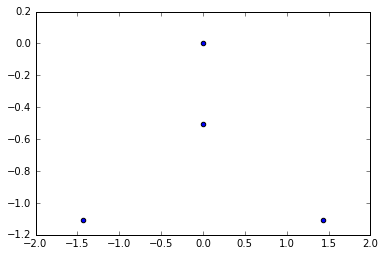

In [20]:
def qdo_water_geometry():
    # returns a 4x3 array of the qdo water frame in a standard reference frame
    # in atomic units ie. in bohrs
    bohr_radius = 0.529 # Angstroms
    R_OH = 0.9572/bohr_radius # Angstroms -> bohrs
    R_OM = 0.2667/bohr_radius # Angstroms -> bohrs
    angle_HOH = 104.52 * np.pi/180 # degrees -> radians
    
    hydrogen_x = R_OH*np.sin(angle_HOH/2)
    hydrogen_y = R_OH*np.cos(angle_HOH/2)
    
    pos = np.zeros((4,3)) # oxygen at 0,0,0
    pos[1] = np.array([hydrogen_x,  -hydrogen_y, 0]) # first hydrogen below it and to the right
    pos[2] = np.array([-hydrogen_x, -hydrogen_y, 0]) # second hydrogen below it and to the left
    pos[3] = np.array([0, -R_OM, 0]) # virtual site directly below oxygen
    
    return pos
p = qdo_water_geometry()
plt.scatter(p[:,[0]], p[:,[1]])

def qdo_water_dimer(U, r):
    # takes a rotation matrix and a vector r
    # returns a water dimer with:
    # first water molecule in standard position
    # second water molecule starts in standard position
    # then rotated by U, then translated by r
    assert np.allclose(U.dot(U.T), np.eye(3))
    pos1 = qdo_water_geometry()
    pos2 = np.array(r).reshape(1,3) + qdo_water_geometry().dot(U)
    return np.vstack([pos1, pos2])

def rotation_scan_matrix(theta):
    st, ct = np.sin(theta), np.cos(theta)
    return np.array([[ct, -st, 0],
                    [st, ct, 0],
                    [0,   0,  1]])

. . . . . . . . . .

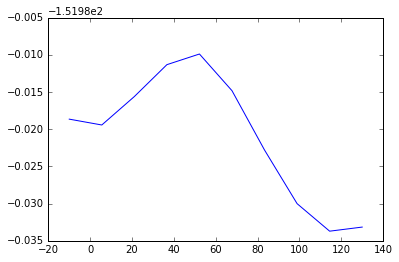

In [26]:
angles_coarse = np.linspace(-10, 130, 10)

energies = []

for angle in angles_coarse:
    U = rotation_scan_matrix(angle * np.pi/180)
    pp = qdo_water_dimer(U, [0, 4.0, 0])
    
    h2o_dimer = Molecule('H2Ox2',
                   [(8,  pp[0]),
                    (1,  pp[1]),
                    (1,  pp[2]),
                   (8, pp[4]),
                   (1, pp[5]),
                   (1, pp[6])],
                   units='Bohr')
    
    en, orbe, orbs = rhf(h2o_dimer)
    print ".",
    energies.append(en)
    
energies = np.array(energies)
plt.plot(angles_coarse, energies)

In [28]:
def hf_of_dimer(_pp):
    pp = _pp.reshape((8,3))
    h2o_dimer = Molecule('H2Ox2',
                   [(8,  pp[0]),
                    (1,  pp[1]),
                    (1,  pp[2]),
                   (8, pp[4]),
                   (1, pp[5]),
                   (1, pp[6])],
                   units='Bohr')
    en, orbe, orbs = rhf(h2o_dimer)
    return en

    

In [29]:
scan = []
unit_vector = np.array([0., 1., 0.])
U = np.eye(3)
xs = np.linspace(2.5,3.5,10)

radial_energies = []
for xx in xs:
    dimer = qdo_water_dimer(U, xx*unit_vector)
    radial_energies.append(hf_of_dimer(dimer))
    print ".",

. . . . . . . . . .


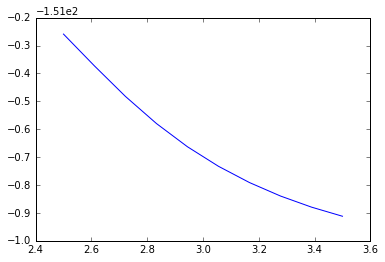

In [30]:
plt.plot(xs, radial_energies)

In [32]:
from PyQuante import SCF

In [38]:
h2 = Molecule('H2',
                 [(1,  (0.00000000,     0.00000000,     0.36628549)),
                  (1,  (0.00000000,     0.00000000,    -0.36628549))],
                 units='Angstrom')

solver = SCF(h2,method="HF",basis="sto-3g")
solver.iterate(iterations=10)
print "HF Result = ",solver.energy

HF Result =  -1.11709942949


In [40]:
from PyQuante.dft import dft
dft(h2)

Final SVWN energy for system H2 is -1.135062


(-1.1350620737249464,
 array([-0.37591414,  0.07999681,  0.54834406,  1.00986562,  1.61159385,
         1.61159385,  2.33291932,  2.55898602,  2.55898602,  4.14133359]),
 array([[  3.16466149e-01,   1.77035728e-01,   7.41539465e-01,
           8.92828360e-01,   4.68393666e-16,   1.75855008e-16,
           3.93438045e-01,  -6.34736278e-16,  -2.77551173e-17,
           1.48948709e+00],
        [  2.77079404e-01,   1.64499811e+00,  -6.73362373e-01,
          -1.50544593e+00,  -7.12464376e-16,   7.70079169e-17,
          -1.95863251e-01,   1.99126624e-16,   6.34877141e-18,
           1.77949330e-01],
        [  2.09069103e-17,  -2.60334026e-17,  -2.36675985e-16,
           8.37574423e-17,   2.46616483e-01,   5.56736835e-01,
           3.77491883e-16,   3.88005419e-01,  -7.85455572e-01,
           9.98078838e-17],
        [ -2.59789310e-19,   9.16505278e-17,  -1.07171720e-16,
          -8.72305255e-17,   5.56736835e-01,  -2.46616483e-01,
           9.74855017e-16,   7.85455572e-01,   3.8800

In [41]:
li_uhf = SCF(h2,method='UHF')
li_uhf.iterate()b

In [46]:
import PyQuante.MP as MP

In [49]:
hf = SCF(h2,method="HF")
hf.iterate()
nclosed,nopen = h2.get_closedopen()
nbf = len(hf.basis_set.get())
emp2 = MP.MP2(hf.ERI,hf.solver.orbs,hf.solver.orbe,nclosed,nbf-nclosed)

In [50]:
hf.energy + emp2

-1.1576654661016677